Chronic Kidney Disease classification

The task is to classify patients into two groups. In the first group there are patients who have Chronic Kidney Disease and in the second patients without this disease. Initial dataset contains personal parameters such as age, blood pessure etc. And the last parameter is the class of particular patient, which shows presence or absence of Chronic Kidney Disease (ckd/notckd).

In [1]:
#importing libraries
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.feature_selection import RFECV,SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR, SVC, LinearSVC

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from IPython.core.display import display, HTML



About dataset

I downloaded dataset from "UCI Machine Learning Repository": 
https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

Below you can see description of this dataset:
    

1. Title: Early stage of Indians Chronic Kidney Disease(CKD)

2. Source Information:
   (a) Source: 
			Dr.P.Soundarapandian.M.D.,D.M
			(Senior Consultant Nephrologist), 
			Apollo  Hospitals, 
			Managiri,
			Madurai Main Road, 
			Karaikudi,
			Tamilnadu,
			India.
            
   (b) Creator: 
			L.Jerlin Rubini(Research Scholar)
			Alagappa University,
			EmailId   :jel.jerlin@gmail.com
			ContactNo :+91-9597231281

   (c) Guided by: 
			Dr.P.Eswaran Assistant Professor,
			Department of Computer Science and Engineering,
			Alagappa University,
			Karaikudi,
			Tamilnadu,
			India.
			Emailid:eswaranperumal@gmail.com

   (d) Date     : July 2015
   
<p style="white-space:pre">
3.Relevant Information:
			age		-	age
			bp		-	blood pressure
			sg		-	specific gravity
			al		-   albumin
			su		-	sugar
			rbc		-	red blood cells
			pc		-	pus cell
			pcc		-	pus cell clumps
			ba		-	bacteria
			bgr		-	blood glucose random
			bu		-	blood urea
			sc		-	serum creatinine
			sod		-	sodium
			pot		-	potassium
			hemo		-	hemoglobin
			pcv		-	packed cell volume
			wc		-	white blood cell count
			rc		-	red blood cell count
			htn		-	hypertension
			dm		-	diabetes mellitus
			cad		-	coronary artery disease
			appet		-	appetite
			pe		-	pedal edema
			ane		-	anemia
			class		-	class	
</p>

4.Number of Instances:  400 (250 CKD, 150 notckd)

5.Number of Attributes: 24 + class = 25 ( 11  numeric ,14  nominal) 

<p style="white-space:pre">
6.Attribute Information :
 	1.Age(numerical)
  	  	age in years
 	2.Blood Pressure(numerical)
	       	bp in mm/Hg
 	3.Specific Gravity(nominal)
	  	sg - (1.005,1.010,1.015,1.020,1.025)
 	4.Albumin(nominal)
		al - (0,1,2,3,4,5)
 	5.Sugar(nominal)
		su - (0,1,2,3,4,5)
 	6.Red Blood Cells(nominal)
		rbc - (normal,abnormal)
 	7.Pus Cell (nominal)
		pc - (normal,abnormal)
 	8.Pus Cell clumps(nominal)
		pcc - (present,notpresent)
 	9.Bacteria(nominal)
		ba  - (present,notpresent)
 	10.Blood Glucose Random(numerical)		
		bgr in mgs/dl
 	11.Blood Urea(numerical)	
		bu in mgs/dl
 	12.Serum Creatinine(numerical)	
		sc in mgs/dl
 	13.Sodium(numerical)
		sod in mEq/L
 	14.Potassium(numerical)	
		pot in mEq/L
 	15.Hemoglobin(numerical)
		hemo in gms
 	16.Packed  Cell Volume(numerical)
 	17.White Blood Cell Count(numerical)
		wc in cells/cumm
 	18.Red Blood Cell Count(numerical)	
		rc in millions/cmm
 	19.Hypertension(nominal)	
		htn - (yes,no)
 	20.Diabetes Mellitus(nominal)	
		dm - (yes,no)
 	21.Coronary Artery Disease(nominal)
		cad - (yes,no)
 	22.Appetite(nominal)	
		appet - (good,poor)
 	23.Pedal Edema(nominal)
		pe - (yes,no)	
 	24.Anemia(nominal)
		ane - (yes,no)
 	25.Class (nominal)		
		class - (ckd,notckd)
</p>
7. Missing Attribute Values: Yes(Denoted by "?")

8. Class Distribution: ( 2 classes)
    		Class 	  Number of instances
    		ckd          	  250
    		notckd       	  150   
</span>

In [2]:
#opening file with dataset
f = open("./chronic_kidney_disease.arff")

In [3]:
#convert file to python list
lst_f = list(f)

In [4]:
#closing file
f.close()

In [5]:
f_names = []

In [6]:
#creating list of feature names
for line in lst_f:
    if '@attribute' in line:
        spltd = line.split()
        f_names.append(spltd[1].replace("'",''))
f_names

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wbcc',
 'rbcc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'class']

In [7]:
#lists of numeric and string indexes according to info
items = list(range(25))   
num_items = items[:5] + items[9:18]
str_items = items[5:9] + items[18:25]

#function which removes garbage from strings
def garb_remove(string):
    if spltd.index(string) in num_items:
        string = ''.join(e for e in string if e.isdigit() or e == '.')
    else:
        string = ''.join(e for e in string if e.isalpha())
    return string

#function which converting strings of numbers to numbers
def convert_nums(string):    
    if spltd.index(string) in num_items:
        string = float(string)
    else:
        pass
    return string

In [8]:
#creating matrix from text data, deleting missing values 
f_items = []
for line in lst_f:
    if '@' not in line and '?' not in line and line is not '\n':
        spltd = line.split(',')
        spltd = [garb_remove(string) for string in spltd]
        spltd = [convert_nums(string) for string in spltd]
        f_items.append(spltd)
f_items


[[48.0,
  70.0,
  1.005,
  4.0,
  0.0,
  'normal',
  'abnormal',
  'present',
  'notpresent',
  117.0,
  56.0,
  3.8,
  111.0,
  2.5,
  11.2,
  32.0,
  6700.0,
  3.9,
  'yes',
  'no',
  'no',
  'poor',
  'yes',
  'yes',
  'ckd'],
 [53.0,
  90.0,
  1.02,
  2.0,
  0.0,
  'abnormal',
  'abnormal',
  'present',
  'notpresent',
  70.0,
  107.0,
  7.2,
  114.0,
  3.7,
  9.5,
  29.0,
  12100.0,
  3.7,
  'yes',
  'yes',
  'no',
  'poor',
  'no',
  'yes',
  'ckd'],
 [63.0,
  70.0,
  1.01,
  3.0,
  0.0,
  'abnormal',
  'abnormal',
  'present',
  'notpresent',
  380.0,
  60.0,
  2.7,
  131.0,
  4.2,
  10.8,
  32.0,
  4500.0,
  3.8,
  'yes',
  'yes',
  'no',
  'poor',
  'yes',
  'no',
  'ckd'],
 [68.0,
  80.0,
  1.01,
  3.0,
  2.0,
  'normal',
  'abnormal',
  'present',
  'present',
  157.0,
  90.0,
  4.1,
  130.0,
  6.4,
  5.6,
  16.0,
  11000.0,
  2.6,
  'yes',
  'yes',
  'yes',
  'poor',
  'yes',
  'no',
  'ckd'],
 [61.0,
  80.0,
  1.015,
  2.0,
  0.0,
  'abnormal',
  'abnormal',
  'notpresent'

In [9]:
#creating dataframe from matrix
df = pd.DataFrame(f_items)
df = df.drop(columns = [25])
df.columns = f_names
df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
1,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29.0,12100.0,3.7,yes,yes,no,poor,no,yes,ckd
2,63.0,70.0,1.010,3.0,0.0,abnormal,abnormal,present,notpresent,380.0,...,32.0,4500.0,3.8,yes,yes,no,poor,yes,no,ckd
3,68.0,80.0,1.010,3.0,2.0,normal,abnormal,present,present,157.0,...,16.0,11000.0,2.6,yes,yes,yes,poor,yes,no,ckd
4,61.0,80.0,1.015,2.0,0.0,abnormal,abnormal,notpresent,notpresent,173.0,...,24.0,9200.0,3.2,yes,yes,yes,poor,yes,yes,ckd
5,48.0,80.0,1.025,4.0,0.0,normal,abnormal,notpresent,notpresent,95.0,...,32.0,6900.0,3.4,yes,no,no,good,no,yes,ckd
6,69.0,70.0,1.010,3.0,4.0,normal,abnormal,notpresent,notpresent,264.0,...,37.0,9600.0,4.1,yes,yes,yes,good,yes,no,ckd
7,73.0,70.0,1.005,0.0,0.0,normal,normal,notpresent,notpresent,70.0,...,29.0,18900.0,3.5,yes,yes,no,good,yes,no,ckd
8,73.0,80.0,1.020,2.0,0.0,abnormal,abnormal,notpresent,notpresent,253.0,...,33.0,7200.0,4.3,yes,yes,yes,good,no,no,ckd
9,46.0,60.0,1.010,1.0,0.0,normal,normal,notpresent,notpresent,163.0,...,28.0,14600.0,3.2,yes,yes,no,good,no,no,ckd


In [10]:
df = df.replace('',np.nan)
df = df.dropna().reset_index(drop=True)

In [11]:
#check for NA values
df.isna().values.any()

False

In [12]:
#shape of dataframe
df.shape

(157, 25)

In [13]:
#preparing variables for plotting
y_cols = [df[col] for col in df.columns[:-1]]
x = list(range(157))


Plots of features
Below you can see scatter and bar plots of each feature of the dataframe.
Where x-axis is value of particular feature and y-axis is number of dataframe's instances.
The red items are the instances with Chronic Kidney Disease and the green ones  - without.

In [14]:
#dividing dataframe by numerical and categorical values
y_cols_num = [y_cols[i] for i in num_items]
y_cols_cat = [y_cols[i] for i in str_items[:-1]]

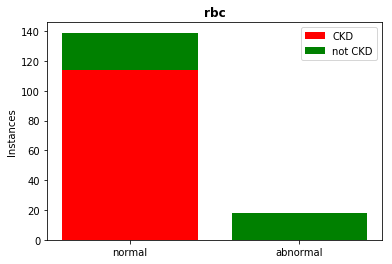

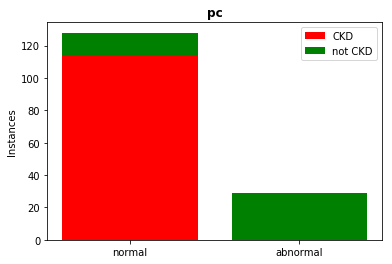

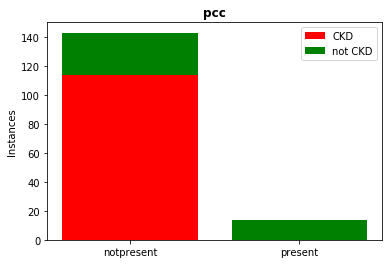

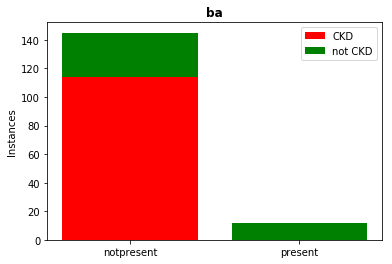

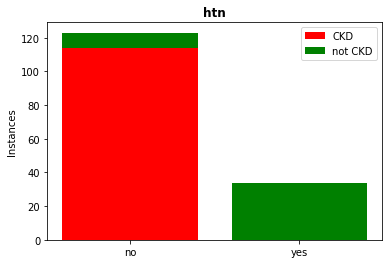

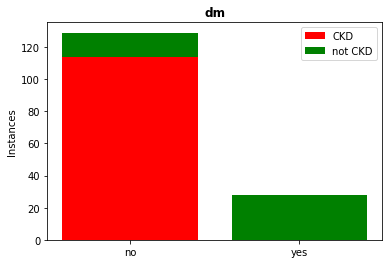

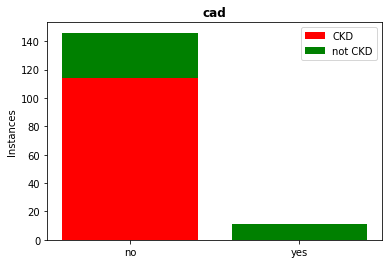

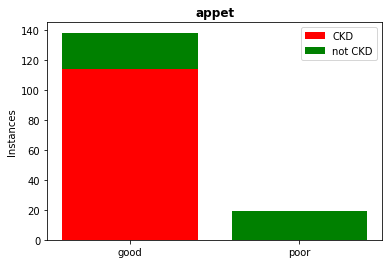

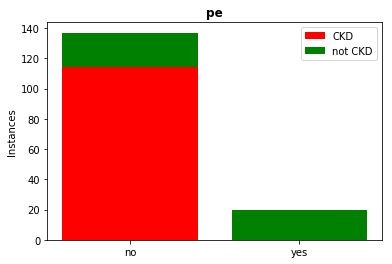

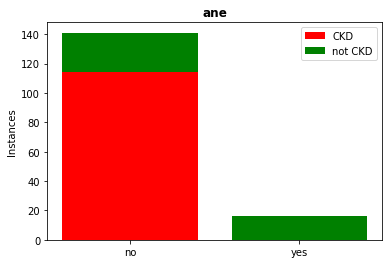

In [15]:
#plotting bars of categorical values
for i in range(len(str_items) - 1):
    bar_values = y_cols_cat[i].value_counts()
    bar_names = bar_values.index

    c0 = df[(df['class'] == 'ckd') & (df[df.columns[str_items[i]]] == bar_names[0])].count()
    c1 = df[(df['class'] == 'ckd') & (df[df.columns[str_items[i]]] == bar_names[1])].count()
    nc0 = bar_values[0] - c0[0]
    nc1 = bar_values[1] - c1[0]
    
    p1 = plt.bar(bar_names, (nc0,nc1),color = 'red')
    p2 = plt.bar(bar_names, (c0[0],c1[0]), bottom = (nc0,nc1), color = 'green')
    plt.legend((p1[0],p2[0]),('CKD','not CKD'))
    plt.ylabel('Instances')
    plt.title(df.columns[str_items[i]],fontweight='bold')
    
    plt.show()

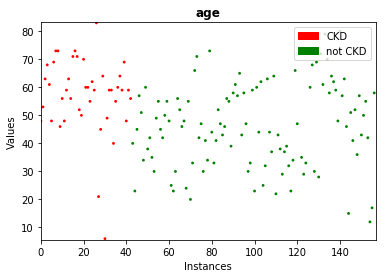

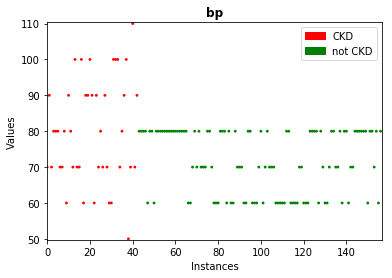

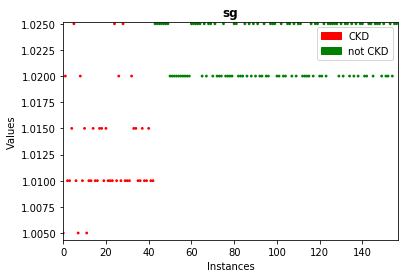

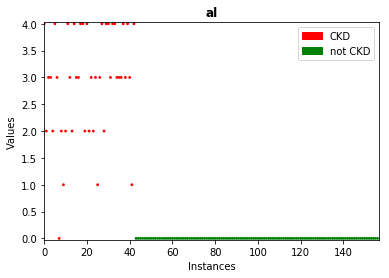

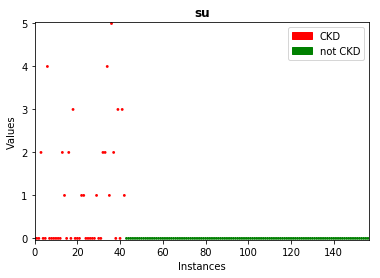

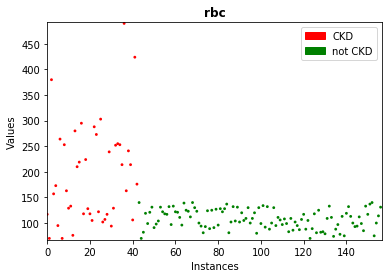

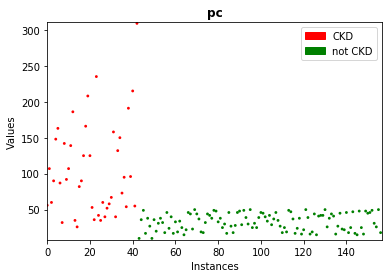

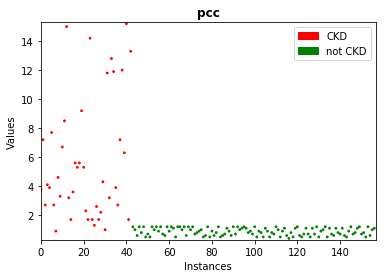

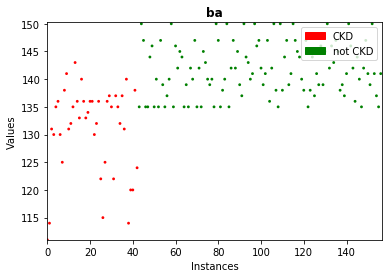

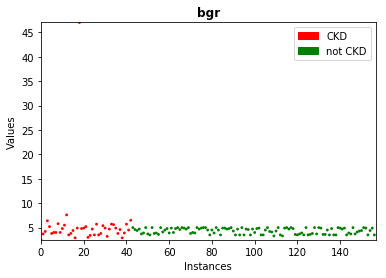

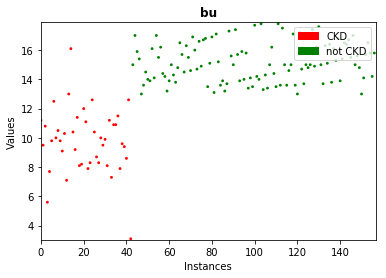

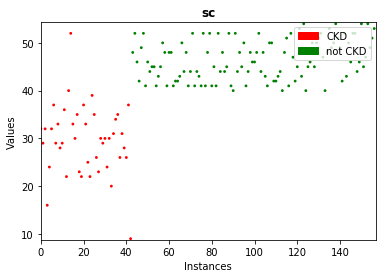

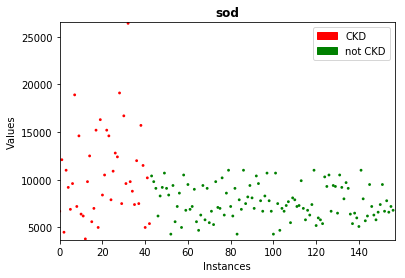

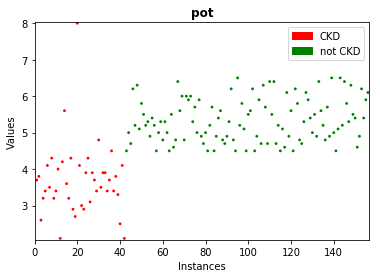

In [16]:
#scatter plots of numerical values
for y in enumerate(y_cols_num):
    fig, ax = plt.subplots()
    for cl in x:
        if df['class'][cl] == 'ckd':
            c = 'r'
        else:
            c = 'g'
        plt.xlabel('Instances')
        plt.ylabel('Values')
        plt.title(df.columns[y[0]],fontweight="bold")
        plt.autoscale(tight=True)
        plt.scatter(x[cl], y[1][cl], c=c, s=8, edgecolors='none')

    red_patch = mpatches.Patch(color='red', label='CKD')
    green_patch = mpatches.Patch(color='green', label='not CKD')

    plt.legend(handles=[red_patch,green_patch], loc='upper right')

    plt.show()


In [17]:
#formatting dataframe by replacing strings in it
replacements = {
    'poor' : 0.0,
    'good' : 1.0,
    'normal' : 1.0,
    'abnormal' : 0.0,
    'notpresent' : 0.0,
    'present' : 1.0,
    'yes' : 1.0,
    'no' : 0.0,
    'ckd' : 1.0,
    'notckd' : 0.0
}
df_num = df.replace(replacements)
df_num

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1.0
1,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0,1.0
2,63.0,70.0,1.010,3.0,0.0,0.0,0.0,1.0,0.0,380.0,...,32.0,4500.0,3.8,1.0,1.0,0.0,0.0,1.0,0.0,1.0
3,68.0,80.0,1.010,3.0,2.0,1.0,0.0,1.0,1.0,157.0,...,16.0,11000.0,2.6,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,61.0,80.0,1.015,2.0,0.0,0.0,0.0,0.0,0.0,173.0,...,24.0,9200.0,3.2,1.0,1.0,1.0,0.0,1.0,1.0,1.0
5,48.0,80.0,1.025,4.0,0.0,1.0,0.0,0.0,0.0,95.0,...,32.0,6900.0,3.4,1.0,0.0,0.0,1.0,0.0,1.0,1.0
6,69.0,70.0,1.010,3.0,4.0,1.0,0.0,0.0,0.0,264.0,...,37.0,9600.0,4.1,1.0,1.0,1.0,1.0,1.0,0.0,1.0
7,73.0,70.0,1.005,0.0,0.0,1.0,1.0,0.0,0.0,70.0,...,29.0,18900.0,3.5,1.0,1.0,0.0,1.0,1.0,0.0,1.0
8,73.0,80.0,1.020,2.0,0.0,0.0,0.0,0.0,0.0,253.0,...,33.0,7200.0,4.3,1.0,1.0,1.0,1.0,0.0,0.0,1.0
9,46.0,60.0,1.010,1.0,0.0,1.0,1.0,0.0,0.0,163.0,...,28.0,14600.0,3.2,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [18]:
#prepare variables for feature selection
y = df_num['class']
X = df_num.loc[:, df.columns != 'class']

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

#checking for NA values
X.isna().values.any()
y.isna().values.any()

False

Feature selection
I used feature ranking with recursive feature elimination and cross-validated selection.
I chose this type of RFE, because it has cross-validation selection, which helped to identify threshold more precisely.

Optimal number of features : 2


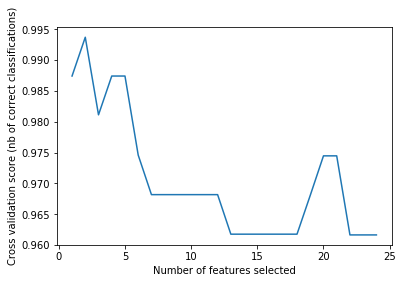

[11 12 14  1 18 15  6 21 17  9 10  4  8 13  3  7 19  5  2  1 22 16 20 23]


In [19]:
# rfecv for classification
svc = SVC(kernel="linear")

rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(3),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plotting number of features and cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print(rfecv.ranking_)

As we can see, we should use 2 features. And it's 'al' and 'cad' columns in our dataframe.

In [20]:
#reshape data by new features
X = df_num[['al','cad']]

Build models


I decided to use six popular algorithms for classification:

    Logistic Regression (LR)
    Linear Discriminant Analysis (LDA)
    K-Nearest Neighbors (KNN)
    Classification and Regression Trees (CART)
    Gaussian Naive Bayes (NB)
    Support Vector Machines (SVM)
    
 And for evaluation i choose Stratified Shuffle Split validation algorithm. Because provided data isn't so big, and we should check, that train and test groups contain both classes.

In [22]:
#randomise data
X = X.sample(n=157)
y = y.sample(n=157)
print(X,y)

      al  cad
114  0.0  0.0
67   0.0  0.0
12   3.0  0.0
125  0.0  0.0
111  0.0  0.0
70   0.0  0.0
117  0.0  0.0
77   0.0  0.0
81   0.0  0.0
110  0.0  0.0
86   0.0  0.0
78   0.0  0.0
4    2.0  1.0
146  0.0  0.0
145  0.0  0.0
112  0.0  0.0
54   0.0  0.0
124  0.0  0.0
107  0.0  0.0
148  0.0  0.0
33   4.0  1.0
0    4.0  0.0
25   1.0  0.0
2    3.0  0.0
127  0.0  0.0
76   0.0  0.0
32   4.0  0.0
128  0.0  0.0
47   0.0  0.0
82   0.0  0.0
..   ...  ...
150  0.0  0.0
65   0.0  0.0
5    4.0  0.0
74   0.0  0.0
17   4.0  0.0
99   0.0  0.0
154  0.0  0.0
43   0.0  0.0
39   4.0  1.0
115  0.0  0.0
149  0.0  0.0
40   3.0  1.0
57   0.0  0.0
62   0.0  0.0
23   2.0  0.0
19   2.0  0.0
83   0.0  0.0
131  0.0  0.0
134  0.0  0.0
28   2.0  0.0
87   0.0  0.0
52   0.0  0.0
144  0.0  0.0
116  0.0  0.0
98   0.0  0.0
71   0.0  0.0
51   0.0  0.0
24   3.0  0.0
88   0.0  0.0
136  0.0  0.0

[157 rows x 2 columns] 97     0.0
84     0.0
120    0.0
32     1.0
51     0.0
74     0.0
142    0.0
67     0.0
59     0.0
140    0.

In [25]:
# Split-out validation dataset

sss = StratifiedShuffleSplit(n_splits=3, test_size=0.20, random_state=7)
sss.get_n_splits(X, y)

print(sss)       

for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

StratifiedShuffleSplit(n_splits=3, random_state=7, test_size=0.2,
            train_size=None)
TRAIN: [  7  22 111  61 104 131 140 102  41  77  58  47  99  75  85  21   6  71
  46  72 114  11 145   4  28 153  36  86 133 124  49 146  88  91  54  83
  19 152 118 128  37 149  51 138  90 156 144  48 136 127  10  66  95 121
  65   3  20  38 134 109  39  35 103   1  26  29  45 155  79  70  14 105
  80 129 147  56  53  69  74  13 116 115 112   5 107  30  57  25  40 143
 135  92 139 123  73  81  67  44  89 100  60  97  12  32 130  96 137  76
  50 132  16 151   2  62 150  15  42  43 108 126 119  34  84  87  17] TEST: [  0   8 122 113  27  18 142  55  23  82 120 101  52  78  24 141   9 154
  93 110  31  98  33 106  68  64 148  59  94 117  63 125]
TRAIN: [115 113 135 118  57  35 109  10  82  98 108  76  44  71 133  88  90  26
 138 130 122  34 142  91 103 112  24  14  64 131  89 111 105 137  13 126
 124  72  93 107  58 106  48  47 156  23 155  33 146  67   8 136  55 134
  66  92  81  87  30  95  7

In [26]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [27]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    skfold = model_selection.StratifiedShuffleSplit(n_splits=3, test_size=0.20, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.720000 (0.000000)
LDA: 0.720000 (0.000000)
KNN: 0.573333 (0.207418)
CART: 0.720000 (0.000000)
NB: 0.466667 (0.185712)
SVM: 0.720000 (0.000000)


Make predictions

After evaluation of algorithms our goal is to choose the most accurate model.
Moreover, we should check prediction accuracy for both classes.
So, the "1.0" class means ckd diagnosed and the "0.0" means doesn't.<br>

For this goals i decided to make confusion matrix and classification report.

In [28]:
# Make predictions on validation dataset
for model in models:
    nb = model[1]
    nb.fit(X_train, y_train)
    predictions = nb.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    print(model[0])
    print(accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test, predictions))
    print(tn, fp, fn, tp)
    print(classification_report(y_test, predictions))
    print(predictions)

LR
0.71875
[[23  0]
 [ 9  0]]
23 0 9 0
             precision    recall  f1-score   support

        0.0       0.72      1.00      0.84        23
        1.0       0.00      0.00      0.00         9

avg / total       0.52      0.72      0.60        32

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
LDA
0.71875
[[23  0]
 [ 9  0]]
23 0 9 0
             precision    recall  f1-score   support

        0.0       0.72      1.00      0.84        23
        1.0       0.00      0.00      0.00         9

avg / total       0.52      0.72      0.60        32

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
KNN
0.6875
[[22  1]
 [ 9  0]]
22 1 9 0
             precision    recall  f1-score   support

        0.0       0.71      0.96      0.81        23
        1.0       0.00      0.00      0.00         9

avg / total       0.51      0.69      0.59        32

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.

/home/one/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


As we can see, results of evaluating may differ between several randomised splittings of dataset. Prediction accuracy varies between about 68% and 75% . According to outputs above, standart deviation of cross validation score in every algorithm is no more than 4%.

Summary
1. We can predict diagnosis of Chronic Kidney Disease with 75% accuracy based on provided dataset.
2. The most valuable features for prediction of Chronic Kidney Disease are level of Albumin and Coronary Artery Disease.
3. Using this models there is 3.1% probability to diagnose Chronic Kidney Disease in patients who doesn't have it.
4. Using this models there is 25% probability to diagnose absence of Chronic Kidney Disease in patients who have this disease.
